File is at:  C:\Users\hanr\GitHub\SGMPy\data/spectra_example.hdf5
estimate energy range:  690 - 750
estimate roi:  64 - 80
default bin interval: 0.1

Generated plot for No. 1 in c scan array.  Real scan number is: S1
Generated plot for No. 2 in c scan array.  Real scan number is: S10
Generated plot for No. 3 in c scan array.  Real scan number is: S2
Generated plot for No. 4 in c scan array.  Real scan number is: S3
Generated plot for No. 5 in c scan array.  Real scan number is: S4
Generated plot for No. 6 in c scan array.  Real scan number is: S5
Generated plot for No. 7 in c scan array.  Real scan number is: S6
Generated plot for No. 8 in c scan array.  Real scan number is: S7
Generated plot for No. 9 in c scan array.  Real scan number is: S8
Generated plot for No. 10 in c scan array.  Real scan number is: S9


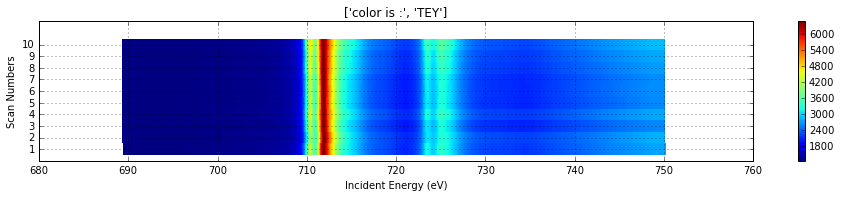

Generated plot for No. 1 in c scan array.  Real scan number is: S1
Generated plot for No. 2 in c scan array.  Real scan number is: S10
Generated plot for No. 3 in c scan array.  Real scan number is: S2
Generated plot for No. 4 in c scan array.  Real scan number is: S3
Generated plot for No. 5 in c scan array.  Real scan number is: S4
Generated plot for No. 6 in c scan array.  Real scan number is: S5
Generated plot for No. 7 in c scan array.  Real scan number is: S6
Generated plot for No. 8 in c scan array.  Real scan number is: S7
Generated plot for No. 9 in c scan array.  Real scan number is: S8
Generated plot for No. 10 in c scan array.  Real scan number is: S9


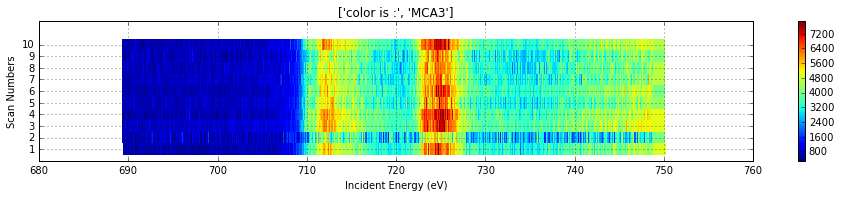

Generated plot for No. 1 in c scan array.  Real scan number is: S1
Generated plot for No. 2 in c scan array.  Real scan number is: S10
Generated plot for No. 3 in c scan array.  Real scan number is: S2
Generated plot for No. 4 in c scan array.  Real scan number is: S3
Generated plot for No. 5 in c scan array.  Real scan number is: S4
Generated plot for No. 6 in c scan array.  Real scan number is: S5
Generated plot for No. 7 in c scan array.  Real scan number is: S6
Generated plot for No. 8 in c scan array.  Real scan number is: S7
Generated plot for No. 9 in c scan array.  Real scan number is: S8
Generated plot for No. 10 in c scan array.  Real scan number is: S9


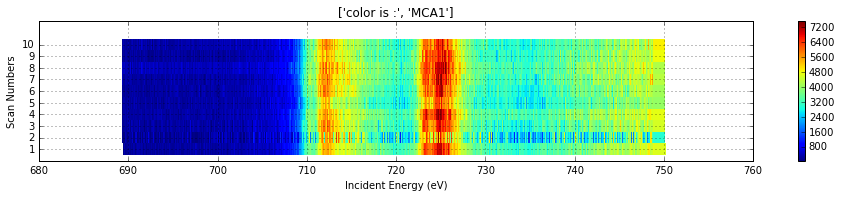

In [1]:
%matplotlib inline
from scripts.open_hdf5 import *
from scripts.widget import *
from scripts.xas_tool import *

file_directory = get_abs_path("data/spectra_example.hdf5")

opened_xas_data = HDF5MultiCScan()
xas_process_para = opened_xas_data.read_all_hdf5_xas(file_directory)

summary_plot(opened_xas_data, "TEY")
summary_plot(opened_xas_data, "PFY_SDD3", xas_process_para)
summary_plot(opened_xas_data, "PFY_SDD1", xas_process_para)

In [2]:
input_bad_scan = text_field()

10


Original scan [u'S1', u'S10', u'S2', u'S3', u'S4', u'S5', u'S6', u'S7', u'S8', u'S9']

numb_of_bins after calculation 600
Total good scan numbers: 10
Start creating bins
Energy range is:  690 - 750
created bins completed.

Start assigning data points into bins
Assign data points completed

Start calcualting average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not

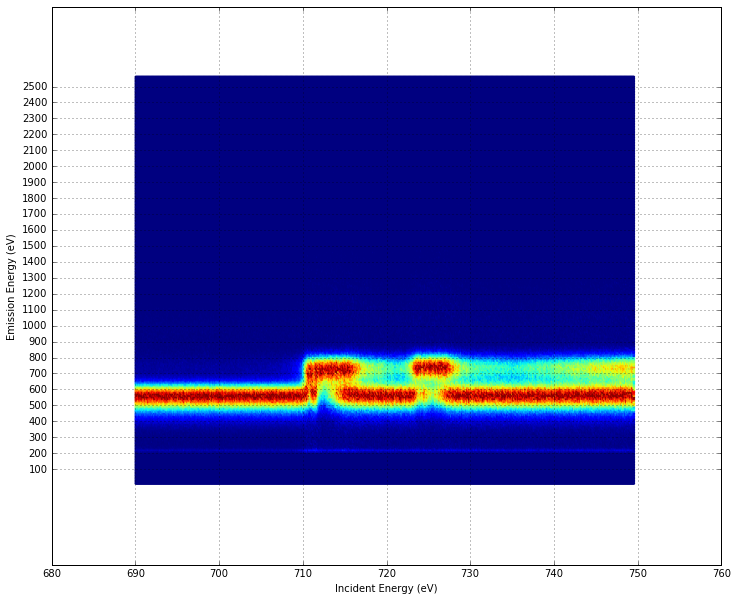

Incident Energy range: 690.05 - 749.55
Emission Energy range: 10 - 2560
Plotting average XAS.


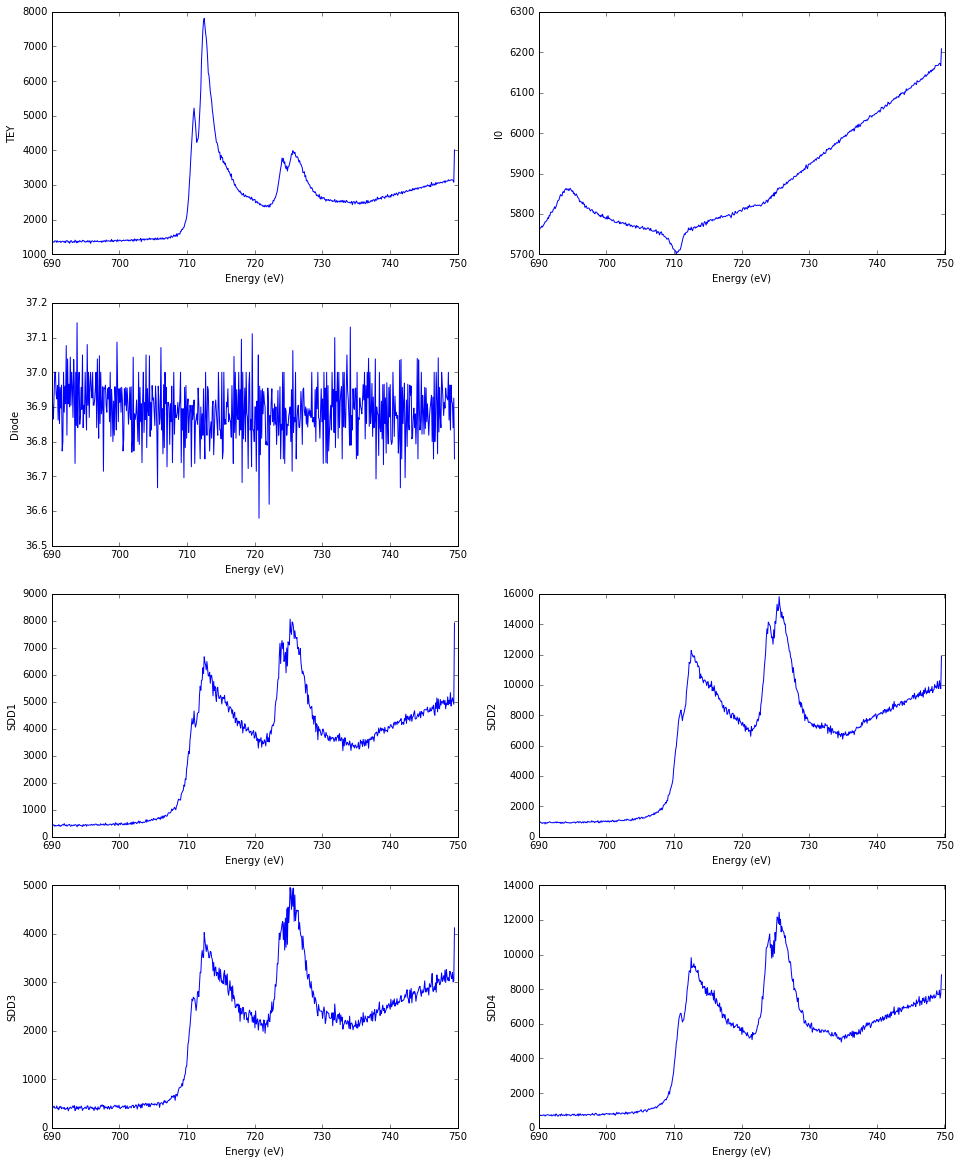

Grating: Medium Energy.
Sun May 15 11:21:33 2016.  Exit Slit: 10.0934
Export data complete.
Plotting disivion SDD.


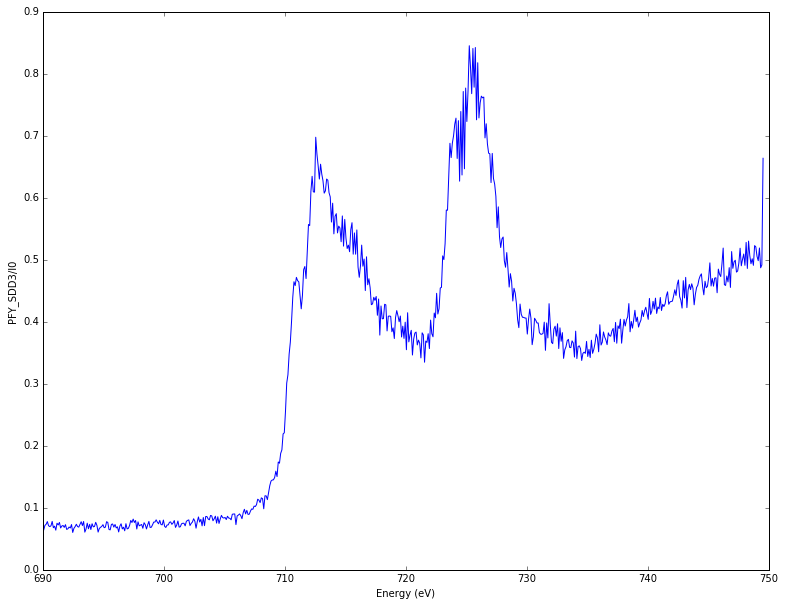

Grating: Medium Energy.
Sun May 15 11:21:33 2016.  Exit Slit: 10.0934
Export data complete.


In [3]:
bad_scan = input_bad_scan.value
xas_process_data = XASProcess("multi")
good_scan_index = xas_process_data.generate_good_scan_index(opened_xas_data, bad_scan)

xas_process_data.process_xas(good_scan_index, opened_xas_data, xas_process_para)

matplotlib.rcParams['figure.figsize'] = (12, 10)
xas_process_data.plot_excitation_emission_matrix("SDD3")

matplotlib.rcParams['figure.figsize'] = (16, 20)
xas_process_data.plot_avg_xas_all()

export = ExportData(file_directory, xas_process_data)
# todo: please change the name of the exported data file
export.export_all("data/output_avg_all.xas")

matplotlib.rcParams['figure.figsize'] = (13, 10)
xas_process_data.plot_division("PFY_SDD3", "I0")

# todo: please change the name of the exported data file
export.export_normalized_data("data/output_normlized.xas",
                       xas_process_data.get_mean_energy_array(), 
                       xas_process_data.get_normalized_array(), "Energy", "PFY_SDD3/I0")